In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")


In [3]:
import csv

with open("Telecom Churn Data Dictionary.csv", 'r') as file:
  csvreader = csv.reader(file)
  for row in csvreader:
    print(row)

['S.No.', 'Variable Name\xa0', 'Meaning']
['1', 'CustomerID\xa0', 'The unique ID of each customer']
['2', 'Gender\xa0', 'The gender of a person']
['3', 'SeniorCitizen', 'Whether a customer can be classified as a senior citizen.']
['4', 'Partner\xa0', 'If a customer is married/ in a live-in relationship.']
['5', 'Dependents', 'If a customer has dependents (children/ retired parents)']
['6', 'Tenure', 'The time for which a customer has been using the service.']
['7', 'PhoneService \xa0', 'Whether a customer has a landline phone service along with the internet service.']
['8', 'MultipleLines', 'Whether a customer has multiple lines of internet connectivity.']
['9', 'InternetService\xa0', 'The type of internet services chosen by the customer.']
['10', 'OnlineSecurity\xa0', 'Specifies if a customer has online security.']
['11', 'OnlineBackup\xa0', 'Specifies if a customer has online backup.']
['12', 'DeviceProtection\xa0', 'Specifies if a customer has opted for device protection.']
['13', '

In [4]:
churn_data= pd.read_csv('churn_data.csv')
churn_data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
customer_data= pd.read_csv('customer_data.csv')
customer_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [6]:
internet_data= pd.read_csv('internet_data.csv')
internet_data.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


In [7]:
merged= pd.merge(churn_data, customer_data,how='inner',on = 'customerID')
merged.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,0,Yes,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,0,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,0,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,0,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,0,No,No


In [8]:
teleco= pd.merge(merged,internet_data,how= 'inner', on= 'customerID')
teleco.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [9]:
teleco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


In [10]:
teleco.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [11]:
teleco.shape

(7043, 21)

In [12]:
teleco.columns

Index(['customerID', 'tenure', 'PhoneService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'gender',
       'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'],
      dtype='object')

In [13]:
teleco.nunique()

customerID          7043
tenure                73
PhoneService           2
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
dtype: int64

In [14]:
teleco = teleco.drop(['customerID'], axis = 1)
teleco.head()

,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No
2,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,0,No,No,No,DSL,Yes,Yes,No,No,No,No
3,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,0,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,0,No,No,No,Fiber optic,No,No,No,No,No,No


In [15]:
teleco['TotalCharges'] = pd.to_numeric(teleco.TotalCharges, errors='coerce')
teleco.isnull().sum()

tenure               0
PhoneService         0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
dtype: int64

In [16]:
teleco.fillna(teleco["TotalCharges"].mean())

#Removing missing values
teleco.dropna(inplace = True)

In [17]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
teleco[numerical_cols].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [18]:
teleco.drop(labels=teleco[teleco['tenure'] == 0].index, axis=0, inplace=True)
teleco[teleco['tenure'] == 0].index

Int64Index([], dtype='int64')

In [19]:
data = teleco
data['Churn'].replace(to_replace='Yes', value=1, inplace=True)
data['Churn'].replace(to_replace='No',  value=0, inplace=True)

data_dummies = pd.get_dummies(data)
data_dummies.head()

,tenure,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,PhoneService_No,PhoneService_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,...,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes
0,1,29.85,29.85,0,0,1,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0
1,34,56.95,1889.50,0,0,0,1,0,1,0,...,1,1,0,0,1,0,0,1,0,0
2,2,53.85,108.15,1,0,0,1,1,0,0,...,0,1,0,0,1,0,0,1,0,0
3,45,42.30,1840.75,0,0,1,0,0,1,0,...,1,0,0,1,1,0,0,1,0,0
4,2,70.70,151.65,1,0,0,1,1,0,0,...,0,1,0,0,1,0,0,1,0,0


In [20]:
data_dummies.corr()

,tenure,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,PhoneService_No,PhoneService_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,...,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes
tenure,1.000000,0.246862,0.825880,-0.354049,0.015683,-0.007877,0.007877,-0.649346,0.202338,0.563801,...,0.361520,-0.264363,-0.037529,0.325288,-0.246814,-0.037529,0.280264,-0.252890,-0.037529,0.285402
MonthlyCharges,0.246862,1.000000,0.651065,0.192858,0.219874,-0.248033,0.248033,0.058933,0.004810,-0.073256,...,0.482607,0.321267,-0.763191,0.338301,0.016015,-0.763191,0.629668,0.017271,-0.763191,0.627235
TotalCharges,0.825880,0.651065,1.000000,-0.199484,0.102411,-0.113008,0.113008,-0.446776,0.170569,0.358036,...,0.522881,-0.084270,-0.374878,0.432868,-0.197144,-0.374878,0.515709,-0.202605,-0.374878,0.519867
Churn,-0.354049,0.192858,-0.199484,1.000000,0.150541,-0.011691,0.011691,0.404565,-0.178225,-0.301552,...,-0.066193,0.336877,-0.227578,-0.164716,0.128435,-0.227578,0.063254,0.130920,-0.227578,0.060860
SeniorCitizen,0.015683,0.219874,0.102411,0.150541,1.000000,-0.008392,0.008392,0.137752,-0.046491,-0.116205,...,0.059514,0.205254,-0.182519,-0.060577,0.048664,-0.182519,0.105445,0.034196,-0.182519,0.119842
PhoneService_No,-0.007877,-0.248033,-0.113008,-0.011691,-0.008392,1.000000,-1.000000,0.001243,0.003142,-0.004442,...,0.070076,0.055102,-0.171817,0.095138,0.123159,-0.171817,0.021383,0.111273,-0.171817,0.033477
PhoneService_Yes,0.007877,0.248033,0.113008,0.011691,0.008392,-1.000000,1.000000,-0.001243,-0.003142,0.004442,...,-0.070076,-0.055102,0.171817,-0.095138,-0.123159,0.171817,-0.021383,-0.111273,0.171817,-0.033477
Contract_Month-to-month,-0.649346,0.058933,-0.446776,0.404565,0.137752,0.001243,-0.001243,1.000000,-0.570053,-0.621933,...,-0.225988,0.438473,-0.217824,-0.285491,0.294843,-0.217824,-0.112550,0.300860,-0.217824,-0.117867
Contract_One year,0.202338,0.004810,0.170569,-0.178225,-0.046491,0.003142,-0.003142,-0.570053,1.000000,-0.288843,...,0.102911,-0.118709,0.038061,0.096258,-0.093495,0.038061,0.061930,-0.096613,0.038061,0.064780
Contract_Two year,0.563801,-0.073256,0.358036,-0.301552,-0.116205,-0.004442,0.004442,-0.621933,-0.288843,1.000000,...,0.165248,-0.397788,0.217542,0.240924,-0.254456,0.217542,0.072124,-0.258495,0.217542,0.075603


<AxesSubplot:>

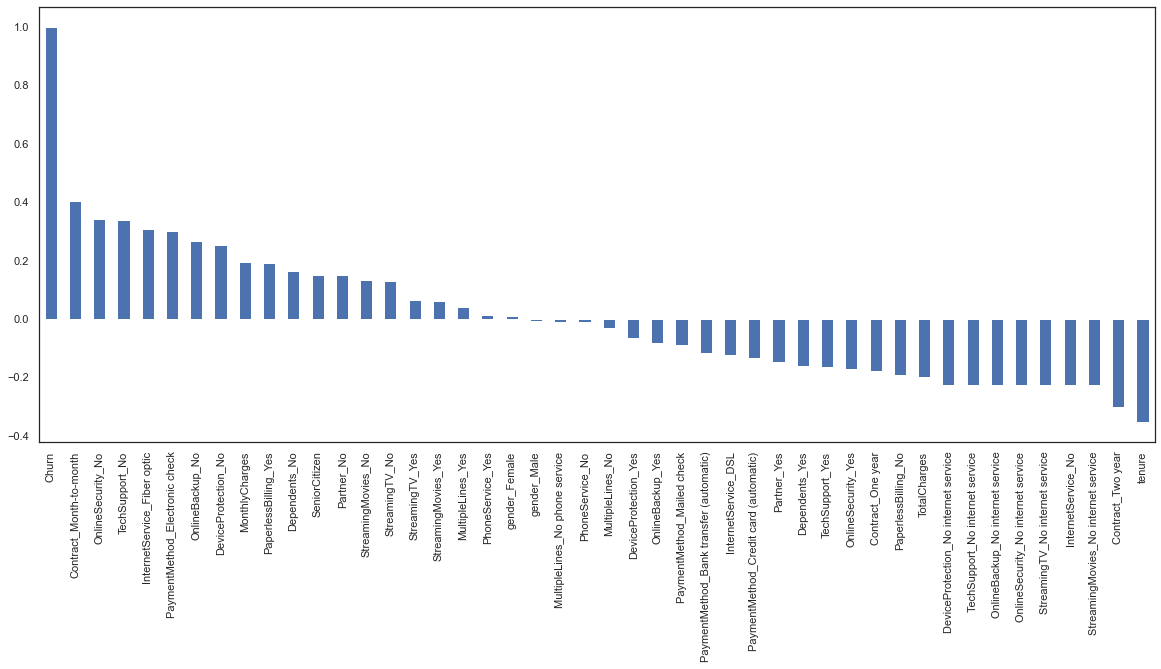

In [21]:
plt.figure(figsize=(20,8))
sns.set(style = 'white')

data_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

In [22]:
import plotly.express as px

px.histogram(teleco,x='Churn',color='Contract',barmode='group')

In [23]:
gender_group= teleco.groupby('gender')['Churn'].agg(Count= 'value_counts')
gender_group.pivot_table(values='Count', index='gender', columns=['Churn'])

Churn,0,1
gender,,
Female,2544,939
Male,2619,930


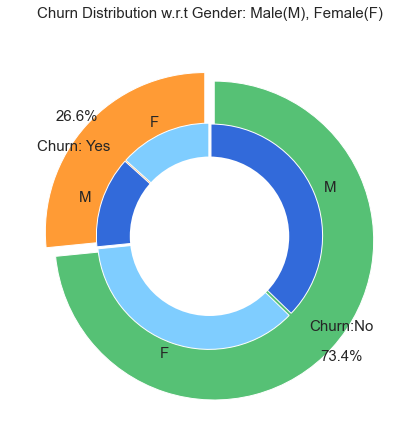

In [24]:
plt.figure(figsize=(6, 6))
labels =["Churn: Yes","Churn:No"]
values = [1869,5163]
labels_gender = ["F","M","F","M"]
sizes_gender = [939,930 , 2544,2619]
colors = ['#ff9b35', '#56c175']
colors_gender = ['#7fcdff','#326ada', '#7fcdff','#326ada']
explode = (0.4,0.4) 
explode_gender = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":15}
#Plot
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Churn Distribution w.r.t Gender: Male(M), Female(F)', fontsize=15, y=1.1)

# show plot 
 
plt.axis('equal')
plt.tight_layout()
plt.show()

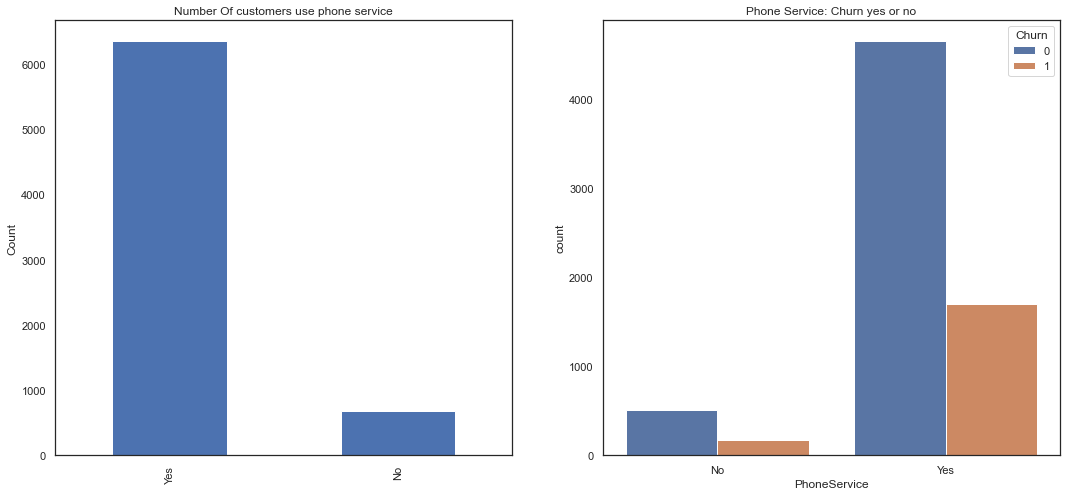

In [25]:
f,ax=plt.subplots(1,2,figsize=(18,8))
teleco['PhoneService'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('Number Of customers use phone service')
ax[0].set_ylabel('Count')
sns.countplot('PhoneService',hue='Churn',data=teleco,ax=ax[1])
ax[1].set_title('Phone Service: Churn yes or no')
plt.show()

In [26]:
color_map = {"Yes": '#7fcdff', "No": '#326ada'}
fig = px.histogram(teleco, x="Churn", color="PhoneService", title="Churn distribution w.r.t. Phone Service", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

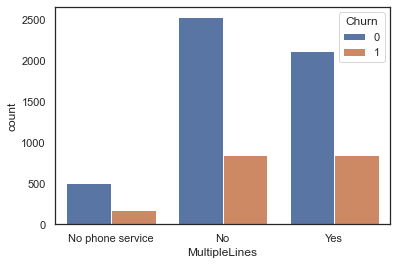

In [27]:
sns.countplot('MultipleLines',hue='Churn',data= teleco)
plt.show()

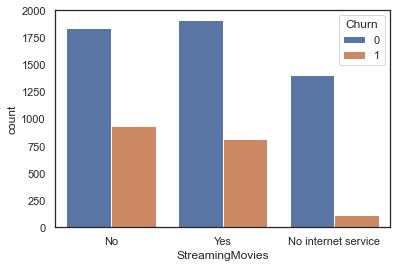

In [28]:
sns.countplot('StreamingMovies',hue= 'Churn',data= teleco)
plt.show()

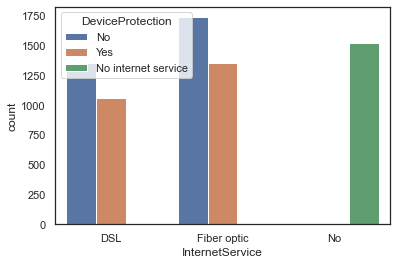

In [29]:
sns.countplot('InternetService',hue='DeviceProtection',data= teleco)
plt.show()

In [30]:
fig = px.histogram(teleco, x="Churn", color="PaymentMethod", title="Churn distribution w.r.t. Customer Payment Method",text_auto=True)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.data[0].marker.color = ('#7fcdff')
fig.data[1].marker.color = ('#326ada')
fig.data[2].marker.color = ('#ff9b35')
fig.data[3].marker.color = ('#56c175')


fig.show()

In [31]:
teleco[teleco["gender"]=="Male"][["InternetService", "Churn"]].value_counts()

InternetService  Churn
DSL              0        992
Fiber optic      0        910
No               0        717
Fiber optic      1        633
DSL              1        240
No               1         57
dtype: int64

In [32]:
teleco[teleco["gender"]=="Female"][["InternetService", "Churn"]].value_counts()

InternetService  Churn
DSL              0        965
Fiber optic      0        889
No               0        690
Fiber optic      1        664
DSL              1        219
No               1         56
dtype: int64

In [33]:
import plotly.graph_objects as go

In [34]:
fig = go.Figure()

colors = {'Female':'steelblue','Male':'firebrick'}

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [965, 992, 219, 240],
  name = 'DSL'))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [889, 910, 664, 633],
  name = 'Fiber optic',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [690, 717, 56, 57],
  name = 'No Internet',
))


fig.update_layout(title_text="Churn Distribution w.r.t Internet Service and Gender")
fig.data[0].marker.color = ('#7fcdff','#7fcdff','#7fcdff','#7fcdff')
fig.data[1].marker.color = ('#326ada','#326ada','#326ada','#326ada')
fig.data[2].marker.color = ('#ff9b35','#ff9b35','#ff9b35','#ff9b35')


fig.show()

In [35]:
color_map = {"Yes": "#7fcdff", "No": "#326ada"}
fig = px.histogram(teleco, x="Churn", color="Dependents", barmode="group", title="<b>Churn distribution w.r.t. Dependents</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [36]:
color_map = {"Yes": '#7fcdff', "No": '#326ada'}
fig = px.histogram(teleco, x="Churn", color="SeniorCitizen", title="<b>Churn distribution w.r.t. Senior Citizen</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [37]:
color_map = {"Yes": "#7fcdff", "No": "#326ada", "No internet service":"#ff9b35"}
fig = px.histogram(teleco, x="Churn", color="OnlineSecurity", barmode="group", title="<b>Churn w.r.t Online Security</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [38]:
color_map = {"Yes": '#7fcdff', "No": '#326ada'}
fig = px.histogram(teleco, x="Churn", color="PaperlessBilling",  title="<b>Churn distribution w.r.t. Paperless Billing</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

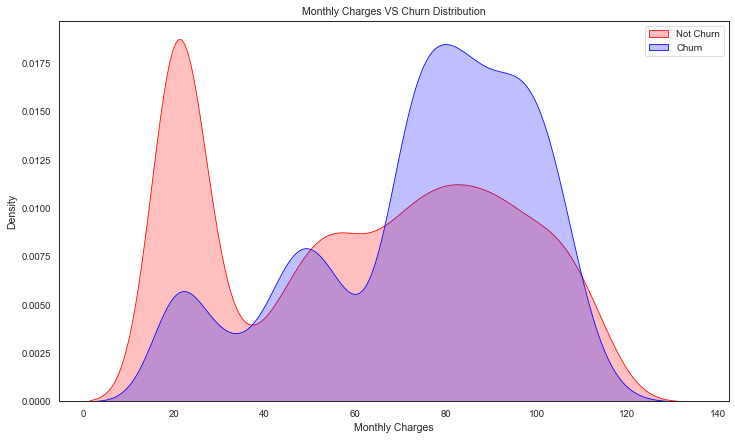

In [39]:
plt.rcParams['figure.figsize']=(12,7)

sns.set_context("paper",font_scale=1.1)

ax = sns.kdeplot(teleco.MonthlyCharges[(teleco["Churn"] == 0) ],
                color="Red", shade = True);
ax = sns.kdeplot(teleco.MonthlyCharges[(teleco["Churn"] == 1) ],
                ax =ax, color="Blue", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Charges');
ax.set_title('Monthly Charges VS Churn Distribution');

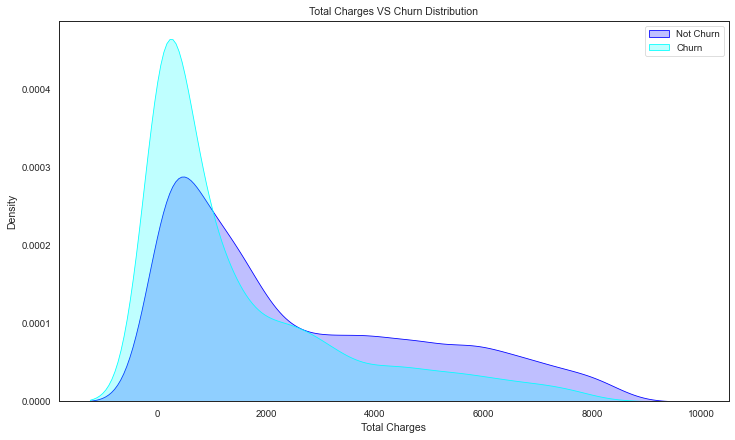

In [40]:
ax = sns.kdeplot(teleco.TotalCharges[(teleco["Churn"] == 0) ],
                color="blue", shade = True);
ax = sns.kdeplot(teleco.TotalCharges[(teleco["Churn"] == 1) ],
                ax =ax, color="cyan", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Total Charges');
ax.set_title('Total Charges VS Churn Distribution');

In [41]:
fig = px.box(teleco, x='Churn', y = 'tenure')

# Update yaxis properties
fig.update_yaxes(title_text='Tenure (Months)', row=1, col=1)
# Update xaxis properties
fig.update_xaxes(title_text='Churn', row=1, col=1)

# Update size and title
fig.update_layout(autosize=True, width=750, height=600,
    title_font=dict(size=25, family='Courier'),
    title='<b>Tenure vs Churn Boxplot</b>',
)

fig.show()

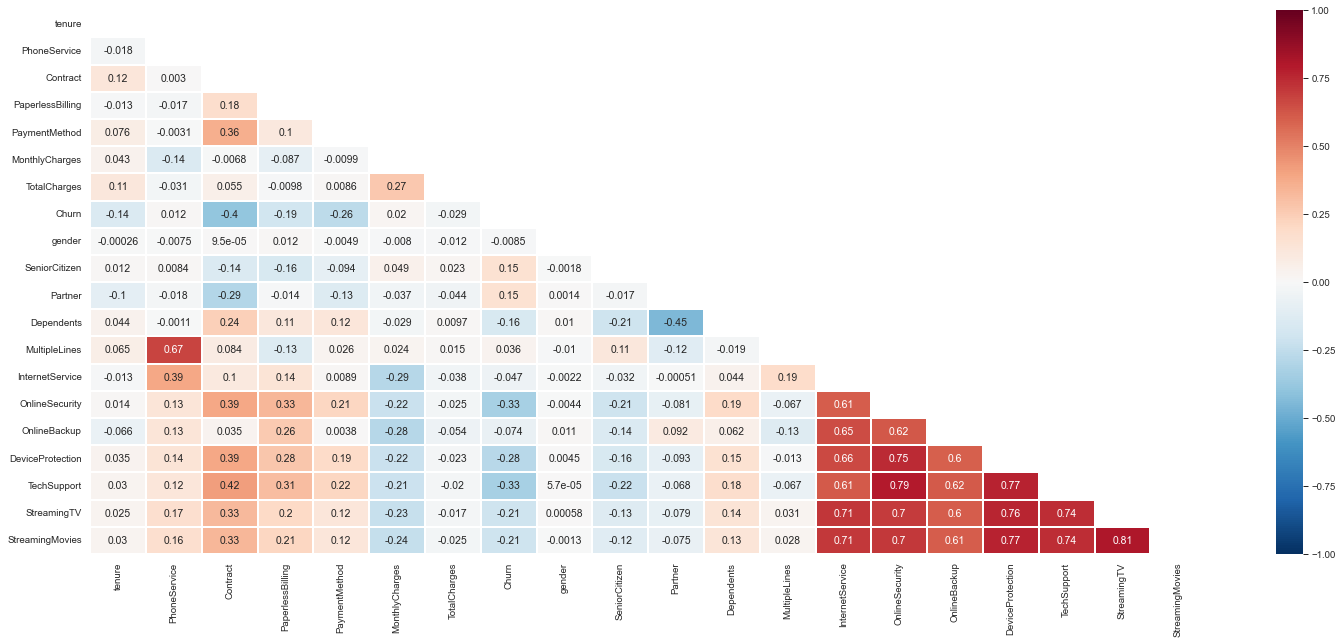

In [42]:
plt.figure(figsize=(25, 10))

corr = teleco.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='RdBu_r', vmin=-1, vmax=1)

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, classification_report
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [44]:


def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [45]:
data = teleco
teleco = teleco.apply(lambda x: object_to_int(x))
X = teleco.drop(columns = ['Churn'])
y = teleco['Churn'].values
teleco.head()

,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,1,0,0,1,2,29.85,29.85,0,0,0,1,0,1,0,0,2,0,0,0,0
1,34,1,1,0,3,56.95,1889.50,0,1,0,0,0,0,0,2,0,2,0,0,0
2,2,1,0,1,3,53.85,108.15,1,1,0,0,0,0,0,2,2,0,0,0,0
3,45,0,1,0,0,42.30,1840.75,0,1,0,0,0,1,0,2,0,2,2,0,0
4,2,1,0,1,2,70.70,151.65,1,0,0,0,0,0,1,0,0,0,0,0,0


In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

In [47]:
def distplot(feature, frame, color='r'):
    plt.figure(figsize=(8,3))
    plt.title("Distribution for {}".format(feature))
    ax = sns.distplot(frame[feature], color= color)

Distribution Graph Before Scaling


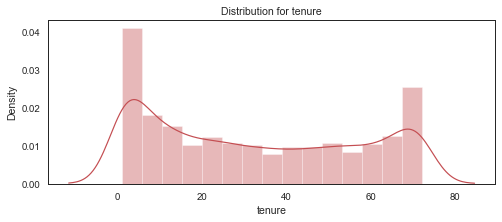

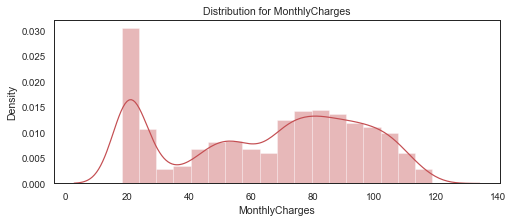

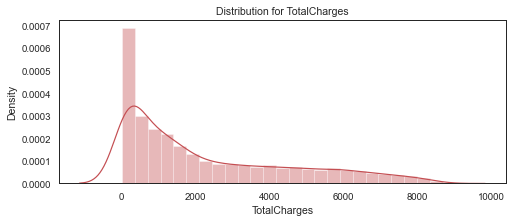

In [48]:
print('Distribution Graph Before Scaling')
num_cols = ["tenure", 'MonthlyCharges', 'TotalCharges']
for feat in num_cols: distplot(feat, teleco)

Distribution Graph After Scaling


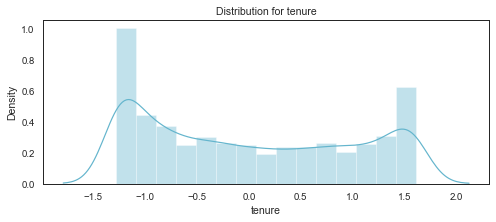

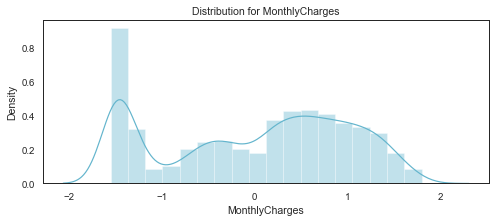

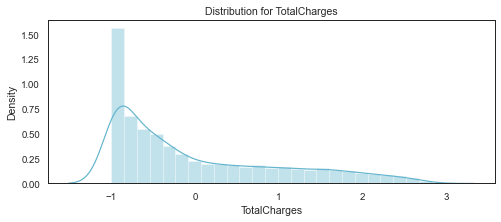

In [49]:
print('Distribution Graph After Scaling')

teleco_std = pd.DataFrame(StandardScaler().fit_transform(teleco[num_cols].astype('float64')),
                       columns=num_cols)
for feat in numerical_cols: distplot(feat, teleco_std, color='c')

In [50]:

cat_cols_ohe =['PaymentMethod', 'Contract', 'InternetService'] # those that need one-hot encoding
cat_cols_le = list(set(X_train.columns)- set(num_cols) - set(cat_cols_ohe)) #those that need label encoding

In [51]:
scaler= StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

SVM accuracy is : 0.8194740582800284
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      1042
           1       0.74      0.47      0.58       365

    accuracy                           0.82      1407
   macro avg       0.79      0.71      0.73      1407
weighted avg       0.81      0.82      0.81      1407

------------------------------------------------------------


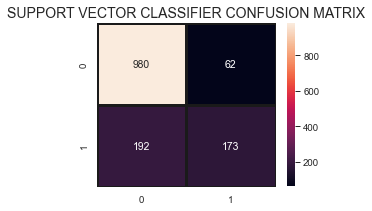

In [52]:
svc_model = SVC()
svc_model.fit(X_train,y_train)
predict_y = svc_model.predict(X_test)
accuracy_svc = svc_model.score(X_test,y_test)
print("SVM accuracy is :",accuracy_svc)
print('-'*60)
print(classification_report(y_test, predict_y))
print('-'*60)
plt.figure(figsize=(4,3))

sns.heatmap(confusion_matrix(y_test, predict_y),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("SUPPORT VECTOR CLASSIFIER CONFUSION MATRIX",fontsize=14)
plt.show()

0.822316986496091
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      1042
           1       0.73      0.50      0.59       365

    accuracy                           0.82      1407
   macro avg       0.79      0.72      0.74      1407
weighted avg       0.81      0.82      0.81      1407

------------------------------------------------------------


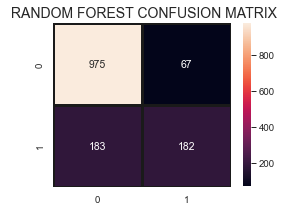

------------------------------------------------------------


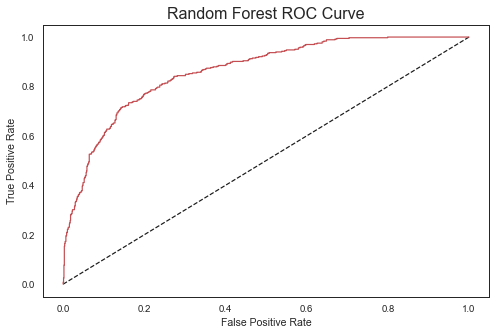

In [53]:
model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =65, max_features = "auto",
                                  max_leaf_nodes = 35)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))
print('-'*60)

# 500, 50, 30

print(classification_report(y_test, prediction_test))
print('-'*60)

plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, prediction_test),annot=True,fmt = "d",linecolor="k",linewidths=3)

    
plt.title(" RANDOM FOREST CONFUSION MATRIX",fontsize=14)
plt.show()
print('-'*60)

y_rfpred_prob = model_rf.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_rfpred_prob)
plt.figure(figsize=(8, 5))
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_rf, tpr_rf, label='Random Forest',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve',fontsize=16)
plt.show();

Logistic Regression accuracy is : 0.820184790334044
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1042
           1       0.69      0.56      0.62       365

    accuracy                           0.82      1407
   macro avg       0.77      0.73      0.75      1407
weighted avg       0.81      0.82      0.81      1407

------------------------------------------------------------


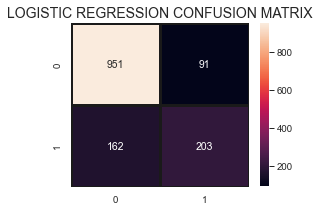

------------------------------------------------------------


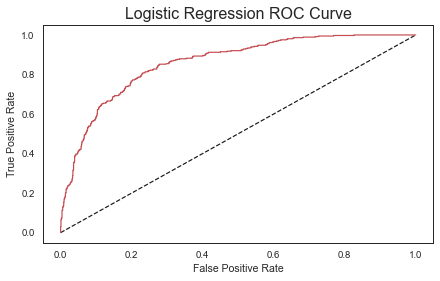

In [54]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
accuracy_lr = lr_model.score(X_test,y_test)
print("Logistic Regression accuracy is :",accuracy_lr)
print('-'*60)

lr_pred= lr_model.predict(X_test)
report = classification_report(y_test,lr_pred)
print(report)

print('-'*60)

plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, lr_pred),annot=True,fmt = "d",linecolor="k",linewidths=3)    
plt.title("LOGISTIC REGRESSION CONFUSION MATRIX",fontsize=14)
plt.show()

print('-'*60)

y_pred_prob = lr_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(7, 4))

plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Logistic Regression',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve',fontsize=16)
plt.show()

In [55]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
predictdt_y = dt_model.predict(X_test)
accuracy_dt = dt_model.score(X_test,y_test)
print("Decision Tree accuracy is :",accuracy_dt)

print(classification_report(y_test, predictdt_y))

Decision Tree accuracy is : 0.7398720682302772
              precision    recall  f1-score   support

           0       0.83      0.82      0.82      1042
           1       0.50      0.52      0.51       365

    accuracy                           0.74      1407
   macro avg       0.66      0.67      0.67      1407
weighted avg       0.74      0.74      0.74      1407



AdaBoost Classifier accuracy 0.820184790334044
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1042
           1       0.69      0.55      0.61       365

    accuracy                           0.82      1407
   macro avg       0.77      0.73      0.75      1407
weighted avg       0.81      0.82      0.81      1407



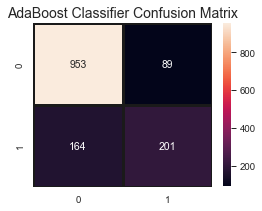

In [59]:
a_model = AdaBoostClassifier()
a_model.fit(X_train,y_train)
a_preds = a_model.predict(X_test)
print("AdaBoost Classifier accuracy",metrics.accuracy_score(y_test, a_preds))


print(classification_report(y_test, a_preds))

plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, a_preds),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("AdaBoost Classifier Confusion Matrix",fontsize=14)
plt.show()

Gradient Boosting Classifier 0.8208955223880597
              precision    recall  f1-score   support

           0       0.85      0.92      0.88      1042
           1       0.71      0.53      0.61       365

    accuracy                           0.82      1407
   macro avg       0.78      0.73      0.75      1407
weighted avg       0.81      0.82      0.81      1407



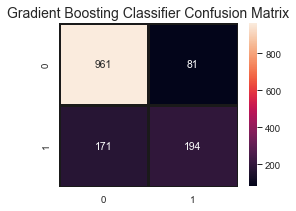

In [58]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)

print("Gradient Boosting Classifier: ", accuracy_score(y_test, gb_pred))

print(classification_report(y_test, gb_pred))


plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, gb_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Gradient Boosting Classifier Confusion Matrix",fontsize=14)
plt.show()

In [63]:
import pickle

In [64]:
with open('model_pickle','wb') as f:
    pickle.dump(gb,f)

In [65]:
with open('model_pickle','rb') as f:
    mp= pickle.load(f)

In [66]:
X_train.columns

Index(['tenure', 'PhoneService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'gender',
       'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'],
      dtype='object')

In [67]:
X_train.head()

,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
1780,-0.580483,1,1,0,0,-1.483871,-0.833309,0,0,0,1,0,2,1,1,1,1,1,1
1827,0.520825,0,0,1,0,-0.460092,0.030209,0,0,1,1,1,0,2,0,0,0,2,2
5422,1.458976,1,2,0,1,-0.068892,0.937704,1,0,1,1,0,0,2,2,2,2,0,0
1716,-0.988374,1,0,1,1,-0.331911,-0.812333,1,0,0,0,0,0,0,0,0,0,0,2
5415,-0.580483,1,0,1,2,-0.480068,-0.601119,0,0,0,0,2,0,0,0,0,0,0,0


ValueError: Expected 2D array, got 1D array instead:
array=[1.  1.  1.  0.  0.  0.  0.3 1.  0.  1.  0.  2.  0.  2.  2.  0.  0.  0.
 2. ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.